In [1]:
import tkinter as tk
import pandas as pd

def compute():
    a = e1.get()
    a2 = e2.get()
    a3 = e3.get()
    a4 = e4.get()
    a6 = e6.get()
    a7 = e7.get()
    global c
    c = pd.DataFrame({'name' : [a],'category': [a2],'main_category': [a3],'backers': [a4],'state': 1,'launched':[a6],'deadline':[a7]})
    print(c)
    return


master = tk.Tk()
master.wm_title("Kickstarter Campaign Adviser")

tk.Label(master, text="Name").grid(row=0)
tk.Label(master, text="Category").grid(row=1)
tk.Label(master, text="Main Category").grid(row=2)
tk.Label(master, text="Virality").grid(row=3)
tk.Label(master, text="Launched").grid(row=4)
tk.Label(master, text="Deadline").grid(row=5)

e1 = tk.Entry(master)
e2 = tk.Entry(master)
e3 = tk.Entry(master)
e4 = tk.Entry(master)
e6 = tk.Entry(master)
e7 = tk.Entry(master)

e1.grid(row=0, column=1)
e2.grid(row=1, column=1)
e3.grid(row=2, column=1)
e4.grid(row=3, column=1)
e6.grid(row=4, column=1)
e7.grid(row=5, column=1)

tk.Button(master, text='Quit', command=master.quit).grid(row=6, column=0, sticky=tk.W, pady=4)
tk.Button(master, text='Compute', command=compute).grid(row=6, column=1, sticky=tk.W, pady=4)


tk.mainloop()

#Loading the Librarys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.preprocessing import minmax_scale
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold, cross_validate

dataset = pd.read_csv("ks-projects-201801.csv")
dataset = dataset.dropna()
dataset = dataset.loc[dataset['state'].isin(['failed','successful'])]
targ_dict = {'failed': 0,'successful': 1 }
dataset['state'] = dataset['state'].map(targ_dict)



In [209]:
dataset = dataset.reset_index()
dataset.drop("index",axis= 1 ,inplace =True)

dataset.drop(dataset[dataset.usd_pledged_real < 100].index, inplace=True)
dataset.drop(dataset[dataset.usd_pledged_real > 1000000].index, inplace=True)

dataset = dataset.reset_index()
dataset.drop("index",axis= 1 ,inplace =True)

In [210]:
print(dataset["usd_pledged_real"].mean())
print(dataset["usd_pledged_real"].median())

print(dataset["backers"].mean())
print(dataset["backers"].median())

11474.043283758196
2361.01
144.51512426809384
36.0


In [211]:
dataset.loc[dataset['backers'] < 100, 'backers'] = 1
dataset.loc[dataset['backers'] > 4500, 'backers'] = 4
dataset.loc[(dataset['backers'] >= 1500) & (dataset['backers'] <= 4500),'backers'] = 3
dataset.loc[(dataset['backers'] >= 100) & (dataset['backers'] <= 1500),'backers'] = 2

In [212]:


y = dataset['usd_pledged_real']
X = dataset.drop('usd_pledged_real',axis=1)

In [213]:
X = X.append(c, ignore_index=True)

X["num_words"]        = X["name"].apply(lambda x: len(x.split()))
X["num_chars"]        = X["name"].apply(lambda x: len(x.replace(" ","")))
X['launched'] = pd.to_datetime(X['launched'])
X['launched_date'] = X['launched'].dt.date
X["launched_week"]    = X["launched"].dt.week
X['launched'] = pd.to_datetime(X['launched'])
X['launched_date'] = X['launched'].dt.date
X['deadline'] = pd.to_datetime(X['deadline'])
X['deadline_date'] = X['deadline'].dt.date
X["launched_day"]     = X["launched"].dt.weekday
X["is_weekend"]       = X["launched_day"].apply(lambda x: 1 if x > 4 else 0)
X['time_campaign_d'] = (X['deadline_date'] - X['launched_date']).dt.days
X['time_campaign_d'] = X['time_campaign_d'].astype(int)
X = X[X['time_campaign_d'] != 14867]


to_drop = ['ID', 'name','goal','deadline', 'pledged', 'currency', 'launched','country','usd_goal_real','usd pledged','launched_date', 'deadline_date']

X.drop(to_drop, axis=1, inplace=True)
#removing outlier value


X = pd.get_dummies(X, columns=['category', 'main_category'],\
                          prefix=['cat', 'main_cat'], drop_first=True)


c2 = X.iloc[232441, :]
X.drop(232441, inplace=True)

C:\Users\BERK\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [214]:


import statsmodels.api as sm

results = sm.OLS(y, X.astype(float)).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       usd_pledged_real   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     606.3
Date:                Sat, 28 Dec 2019   Prob (F-statistic):               0.00
Time:                        08:26:29   Log-Likelihood:            -2.7599e+06
No. Observations:              232441   AIC:                         5.520e+06
Df Residuals:                  232266   BIC:                         5.522e+06
Df Model:                         174                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
backers                 4.51

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [200]:
from math import sqrt
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
print("Linear Regression")
print(lin_reg.predict(X_test))
print("Linear Regression r2")
print(r2_score(y_test,lin_reg.predict(X_test)))

op = lin_reg.predict(X_test)
print(metrics.mean_absolute_error(y_test, op))

Linear Regression
[ 6533.62695064 58191.62695064  -602.37304936 ... -2930.37304936
 45509.62695064 14223.62695064]
Linear Regression r2
0.3163204436990391
13607.800385575229


In [201]:
op2 = lin_reg.predict(sc.transform(np.array([c2])))
print(op2)

[85061.29007903]


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(X_train)
print(x_poly)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y_train)
print(lin_reg2.predict(poly_reg.fit_transform(X_test)))
print("R2 Score Polynomial degree 4")
print(r2_score(y_test,lin_reg2.predict(poly_reg.fit_transform(X_test))))
print(metrics.mean_absolute_error(y_test, lin_reg2.predict(poly_reg.fit_transform(X_test))))

In [203]:
from sklearn.tree import DecisionTreeRegressor
r_dt = DecisionTreeRegressor(random_state=0)
r_dt.fit(X_train,y_train)
Z = X_test + 0.5
K = X_test - 0.4
print("Decision Tree")
print(r_dt.predict(X_test))
print("Decision Tree R2 degeri:")
print(r2_score(y_test, r_dt.predict(X_test)))
dh = r_dt.predict(X_test)
print(metrics.mean_absolute_error(y_test, dh))

Decision Tree
[3.77000e+02 4.86025e+05 1.75000e+02 ... 5.26000e+02 2.62135e+04
 1.00000e+03]
Decision Tree R2 degeri:
0.17711003605874043
10825.367465278525


In [204]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 10, random_state=0)
rf_reg.fit(X_train,y_train)
print("Random Forest")
print(rf_reg.predict(X_test))
print("Random Forest R2 degeri:")
print(r2_score(y_test, rf_reg.predict(X_test)) )
print(r2_score(y_test, rf_reg.predict(K)) )
print(r2_score(y_test, rf_reg.predict(Z)) )
rf =  rf_reg.predict(X_test)
print(metrics.mean_absolute_error(y_test, rf))

Random Forest
[  892.206 51740.752   718.459 ...  1955.223 19166.577  2278.5  ]
Random Forest R2 degeri:
0.5207426863985356
0.5162452602550156
0.43046951865597016
8714.337286985707


In [205]:
datas = pd.DataFrame({'y_test': y_test[:,], 'rf': rf[:,]})
print(datas)

          y_test          rf
217009    115.26    892.2060
210070  98497.52  51740.7520
1635      155.00    718.4590
209257  23748.00  68776.2670
51152     270.00   1157.3010
93543   12825.00   7464.0520
59362    2587.00   2095.0230
136211   1912.00   6259.5000
200711  54012.76  23679.8690
104767    252.00   1175.2010
171114    625.00   2459.5690
49447   22362.00  14273.4100
170974   3620.00    844.3910
84250    5130.33    406.2000
46234   21049.07  21616.4000
145689   5476.00   3149.8000
211612   1110.32   2371.0650
69537     455.50   2108.9000
151849    726.00   1114.8620
224659    945.00    993.6000
192478  12484.00  16997.1080
54605    7000.00   4387.0620
166400  48266.50  14249.2900
13468    2885.00   3608.7500
69768     227.09   2183.1640
140771  12795.01  12842.9800
111809   1040.00   1189.4360
183778    100.00   3754.0020
66581     125.00   1485.7280
62313    1492.00   4563.0345
...          ...         ...
57051   46926.00  19944.9270
180774    239.00   3038.8900
80362     911.

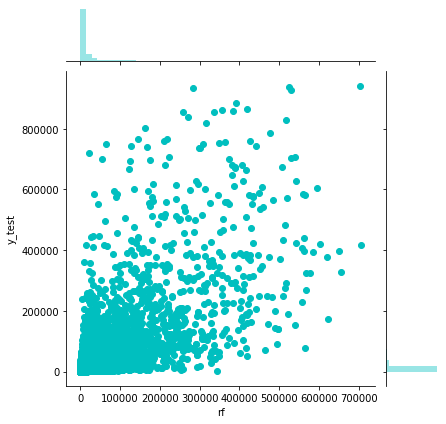

In [206]:
sns.jointplot(x="rf",y="y_test",data=datas,color='c')

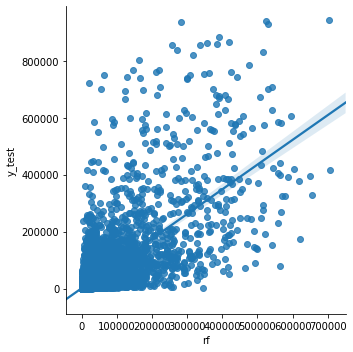

In [207]:
sns.lmplot(x="rf",y="y_test",data=datas)

In [97]:
op3 = rf_reg.predict(sc.transform(np.array([c2])))
print(op3)

[440923.697]


In [107]:
op3 = rf_reg.predict(sc.transform(np.array([c2])))
print(op3)

[94289.539]


In [116]:
op3 = rf_reg.predict(sc.transform(np.array([c2])))
print(op3)

[8392.584]


In [124]:
op3 = rf_reg.predict(sc.transform(np.array([c2])))
print(op3)

[2051.8]
